In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib
import seaborn 
import pylab as pl
import statsmodels.api as sm
from statsmodels.formula.api import ols

if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [16]:
os.getenv('PUIDATA')

'/home/cusp/jc7344/PUIdata'

In [17]:
!wget https://github.com/fedhere/PUI2016_fb55/blob/master/HW9_fb55/MTA_Fare.npy?raw=true

--2016-11-14 10:29:17--  https://github.com/fedhere/PUI2016_fb55/blob/master/HW9_fb55/MTA_Fare.npy?raw=true
Resolving github.com... 192.30.253.112, 192.30.253.113
Connecting to github.com|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/fedhere/PUI2016_fb55/raw/master/HW9_fb55/MTA_Fare.npy [following]
--2016-11-14 10:29:17--  https://github.com/fedhere/PUI2016_fb55/raw/master/HW9_fb55/MTA_Fare.npy
Connecting to github.com|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fedhere/PUI2016_fb55/master/HW9_fb55/MTA_Fare.npy [following]
--2016-11-14 10:29:18--  https://raw.githubusercontent.com/fedhere/PUI2016_fb55/master/HW9_fb55/MTA_Fare.npy
Resolving raw.githubusercontent.com... 151.101.20.133
Connecting to raw.githubusercontent.com|151.101.20.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10708880 (10M) [application/

In [18]:
os.system('mv MTA_Fare.npy?raw=true ' + os.getenv('PUIDATA') + '/MTA_Fare.npy')

0

In [20]:
mta = np.load(os.getenv('PUIDATA') + '/' + 'MTA_Fare.npy')

In [25]:
mta

array([[[56961, 64703, 68002, ..., 36527, 33929, 36824],
        [ 1732,  2083,  2107, ...,  1264,  1172,  1238],
        [  203,   276,   245, ...,   186,   167,   167],
        ..., 
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [   -1,    -1,    -1, ...,  1121,  1377,   712]],

       [[16210, 20179, 21769, ...,    -1,    -1,    -1],
        [  503,   647,   665, ...,    -1,    -1,    -1],
        [   41,    43,    44, ...,    -1,    -1,    -1],
        ..., 
        [    0,     0,     0, ...,    -1,    -1,    -1],
        [    0,     0,     0, ...,    -1,    -1,    -1],
        [   -1,    -1,    -1, ...,    -1,    -1,    -1]],

       [[ 3292,  3429,  3629, ...,  3746,  3406,  3217],
        [  110,    92,   102, ...,   212,   209,   211],
        [    7,     6,    13, ...,    26,    20,    22],
        ..., 
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0, 

In [23]:
mta.shape

(600, 23, 194)

The downloaded data has three dimensions where **23 represents different types of subway cards**, **600 represents the number of gathered stations** and **194 represents number of weeks**.

In [ ]:
# In order to get familiar with the data, we now access each of the three dimensions, by displaying only desired information:
# mta contains the number of stations, mta [0] wil display subway cards, mta[0][1] the number of weeks.

In [26]:
mta[0]

array([[56961, 64703, 68002, ..., 36527, 33929, 36824],
       [ 1732,  2083,  2107, ...,  1264,  1172,  1238],
       [  203,   276,   245, ...,   186,   167,   167],
       ..., 
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       [   -1,    -1,    -1, ...,  1121,  1377,   712]], dtype=int32)

In [27]:
len(mta[0])

23

In [28]:
mta[0][1]

array([1732, 2083, 2107, 2188, 2314, 1921, 2072, 1999, 2031, 1980, 2104,
       2079, 1868, 1974, 1933, 1944, 1934, 1607, 1832, 1768, 1791, 1797,
       1756, 1802, 1906, 1446, 1838, 1820, 1754, 1499, 1016, 1016, 1689,
       1557, 1299, 1297, 1536, 1734, 1777, 1511, 1843, 1784, 1924, 1701,
       1816, 2030, 1962, 1765, 1968, 2008, 2070, 2022, 2115, 2062, 2176,
       2237, 2455, 2417, 2216, 2011, 2063, 2412, 2397, 2136, 2206, 1731,
       2028, 2277, 2259, 1827, 2221, 2206, 2214, 2066, 2212, 2218, 2118,
       1656, 2289, 2159, 2078, 1927, 1613, 1701, 2031, 1727, 1870, 1968,
       1994, 1882, 1908, 1965, 2017, 2089, 2123, 1621, 2021, 2091, 2561,
       2327, 2334, 2436, 2193, 2323, 2626, 2590, 2540, 2552, 2780, 2189,
       2621, 2471, 2585, 2555, 2587, 2744, 2562, 2518, 2446, 2604, 2604,
       2562, 2565, 2325, 2337, 2500,  255,    0,   -1,   -1,    0,  460,
        560,  562,  799,  980, 1124, 1179, 1041, 1017, 1130, 1176, 1138,
       1285, 1285, 1453, 1331, 1328, 1600, 2057, 16

In [29]:
len(mta[0][1])

194

In [32]:
len(mta)

600

In [33]:
mta = mta.astype(float)

note that the missing values are inputted as -1

In [34]:
mta[mta == -1] = np.nan

## Task 1: Identify the most prominent event

In [36]:
mta_all = np.nansum(mta, axis=1)

In [42]:
print(mta_all.shape)

(600, 194)


In [45]:
len(mta_all)

600

In [39]:
mta_all_sum = np.nansum(mta_all, axis=0)

In [48]:
print(mta_all_sum.shape)

(194,)


In [49]:
ridershipavg = np.mean(mta_all_sum)
print(ridershipavg)

29781349.8711


In [50]:
ridershipstd = np.std(mta_all_sum)
print(ridershipstd)

2983960.4217


### Event detection: 
Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.


Identify it, figure out the date (you know when the data starts and what the cadence is) and figure out what it is due to.


In [52]:
lowseg = ridershipavg - 3 * ridershipstd
highseg = ridershipavg + 3 * ridershipstd
print(lowseg)
print(highseg)

20829468.606
38733231.1362


In [53]:
event = np.where(mta_all_sum < lowseg)
print(event)

(array([126]),)


In [54]:
print(mta_all_sum[126])

5218686.0


In [55]:
np.where(mta_all_sum > highseg)

(array([], dtype=int64),)

In [58]:
date = pd.date_range(start=pd.datetime(2010, 5, 28), periods=194, freq='w-Fri')

In [59]:
date

DatetimeIndex(['2010-05-28', '2010-06-04', '2010-06-11', '2010-06-18',
               '2010-06-25', '2010-07-02', '2010-07-09', '2010-07-16',
               '2010-07-23', '2010-07-30',
               ...
               '2013-12-06', '2013-12-13', '2013-12-20', '2013-12-27',
               '2014-01-03', '2014-01-10', '2014-01-17', '2014-01-24',
               '2014-01-31', '2014-02-07'],
              dtype='datetime64[ns]', length=194, freq='W-FRI')

In [60]:
weeks = pd.DataFrame()
weeks['Weekly Ridership Count'] = mta_all_sum
weeks = weeks.set_index(date)
weeks['Week Number'] = [i for i in range(0,len(mta_all_sum))]

In [61]:
weeks.loc[weeks['Week Number'] == 126]

,Weekly Ridership Count,Week Number
2012-10-26,5218686.0,126


In [62]:
weeks.loc[weeks['Week Number'] == 0]

,Weekly Ridership Count,Week Number
2010-05-28,26720267.0,0


In [63]:
mta_all_sum[126]

5218686.0

In [64]:
mta_all_sum[0]

26720267.0

By analyzing the data, it could be say that the low ridership levels recorded on the week of October 19, 2012 could be attributed to **Hurricane Sandy**. This assertion, however, assumes the MTA only has information of 194 out of 196 weeks from May, 21 2010 to February 21, 2012. With this assumption in hand, the low ridership levels could be related to the natural disaster that produced 71.4 billion in damages in New York only. 


### Task 2:  
Some of the time series are stationary, some have a complex structure, some show a downward trend: **Identify the ridership types that have steadily increased in popularity, and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)**

In [65]:
mta_ridetypesum = np.nansum(mta, axis=0)

In [66]:
mta_ridetypesum.shape

(23, 194)

In [67]:
mta_ridetypesum[0]

array([ 11494615.,  12526859.,  12766627.,  12653675.,  12809694.,
        11429783.,  12346877.,  12576759.,  12437115.,  12431257.,
        12401572.,  12280641.,  11913505.,  12391812.,  11878127.,
        12918455.,  12812272.,  12292468.,  12662413.,  12400611.,
        12721967.,  12633600.,  12648413.,  12699903.,  12767910.,
        11074280.,  12651006.,  13210412.,  13306773.,  12600160.,
        10897611.,  10891186.,  12679761.,  12143325.,  11754961.,
        11912201.,  13216489.,  13164779.,  13382528.,  12154310.,
        13055840.,  13215534.,  13518602.,  13262819.,  13186542.,
        13534859.,  13589465.,  13007162.,  13178854.,  13739517.,
        13741510.,  13791231.,  12620609.,  13847203.,  14028576.,
        13939790.,  14440960.,  12781306.,  14120142.,  13830819.,
        13753535.,  13922835.,  13823650.,  13364902.,  13271985.,
        11175879.,  13699219.,  14184755.,  14332556.,  10985709.,
        14021552.,  13566791.,  14183762.,  14252376.,  138914

In [68]:
mta_ridetypesum[0][193]

12459947.0

In [69]:
print(len(mta_ridetypesum))

23


In [70]:
percentages = []
for k in range(0,194): #loops through each of the 194 stations
    divided = mta_ridetypesum[:,k] / mta_all_sum[k] 
    percentages.append(divided)
    k+=1     

In [71]:
print(len(mta_ridetypesum))

23


In [72]:
percentages = np.asarray(percentages)
percentages.shape

(194, 23)

In [73]:
percentages

array([[  4.30183389e-01,   1.98547417e-02,   1.78894170e-03, ...,
          2.29339026e-04,   1.33980697e-05,   0.00000000e+00],
       [  4.28034969e-01,   1.99389591e-02,   1.75924455e-03, ...,
          2.09116588e-04,   1.61962848e-05,   0.00000000e+00],
       [  4.31287642e-01,   1.98030559e-02,   1.74438939e-03, ...,
          2.19247950e-04,   1.57088285e-05,   0.00000000e+00],
       ..., 
       [  4.14525673e-01,   2.18468089e-02,   1.84706662e-03, ...,
          1.69649412e-04,   2.70911066e-05,   3.55994426e-02],
       [  4.03843909e-01,   2.16520901e-02,   1.82607172e-03, ...,
          1.86047714e-04,   2.61675027e-05,   4.45623849e-02],
       [  4.21865975e-01,   2.30062507e-02,   1.86867785e-03, ...,
          2.09376428e-04,   2.77633685e-05,   1.81145145e-02]])

In [74]:
#average usage for first 10 weeks per card
first10avg = []
for i in range(0,23):
    first10avg.append([np.sum(percentages[:,i][0:10]) / 10])

In [76]:
print(first10avg)

[[0.4323758332138799], [0.018667879914906437], [0.001747888774052175], [0.0066771984615906846], [0.0016809924695701049], [0.1377988203571609], [0.31921905128417161], [0.00038445715784217666], [0.011499455022934802], [0.020970967982928107], [0.0014416294491197837], [0.0046142340963523194], [2.0149192786130862e-07], [0.0047993768693420091], [0.029531165859038498], [0.0022565820764281789], [0.0010920669776073161], [1.5862125688679772e-05], [0.0042370026074303865], [0.00074052545834824609], [0.00023214493048325028], [1.6663419196558629e-05], [0.0]]


In [77]:
#average usage for last 10 weeks per card
last10avg = []
for i in range(0,23):
    last10avg.append([np.sum(percentages[:,i][184:]) / 10])

In [78]:
print(last10avg)

[[0.42486319148923801], [0.02241711221425282], [0.0018649674754867968], [0.005993728087443086], [0.0016359719489394387], [0.18469016252295994], [0.27426700469108073], [7.5001053141189809e-08], [1.1986040162549634e-07], [3.1234335191217004e-08], [0.0011225143010573295], [0.0053331510412701717], [0.0048449949884155326], [0.0026290407299293206], [0.018320167354906304], [0.0055663354538111991], [0.0030260589267161911], [0.001101266026220796], [0.0063353579037410237], [0.00072973476735097432], [0.00018290667630431766], [2.656074433966059e-05], [0.035049546560746478]]


In [79]:
first10avg = np.asarray(first10avg)
last10avg = np.asarray(last10avg)

In [80]:
ratt = last10avg / first10avg

In [81]:
#radership ratio per type of card
ridertype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])
riderdict = dict(zip(ridertype, ratt))
print(riderdict)

{'7d': array([ 1.34028841]), 'month': array([ 0.54778793]), '14d': array([ 1.20083868]), 'ez': array([  1.48940837e-06]), 'sen': array([ 2.77094628]), '30d': array([ 0.97321789]), '10t': array([ 0.98262474]), 'rr': array([ 2.46671083]), '1d': array([ 1.06698292]), 'stud': array([ inf]), 'ada': array([ 0.85918119]), 'spec': array([ 69.42739251]), 'exp': array([  1.04231376e-05]), 'ff': array([ 0.77864274]), 'tcmc': array([ 1.49524522]), '2t': array([ 0.89764115]), 'mc': array([ 1.15580418]), 'afas': array([ 0.00019508]), 't': array([ 0.98542833]), 'xbus': array([ 1.59395524]), 'mr': array([ 24045.6034137]), 'umlim': array([ 0.78789865]), 'rfm': array([ 0.62036722])}


In [82]:
riderdict = dict( (key, value) for (key, value) in riderdict.items() if value > 1.05 or value < .95 )

In [83]:
print(riderdict)

{'2t': array([ 0.89764115]), 'xbus': array([ 1.59395524]), '7d': array([ 1.34028841]), 'exp': array([  1.04231376e-05]), 'rr': array([ 2.46671083]), 'ff': array([ 0.77864274]), 'umlim': array([ 0.78789865]), 'tcmc': array([ 1.49524522]), 'ada': array([ 0.85918119]), 'mc': array([ 1.15580418]), 'month': array([ 0.54778793]), '14d': array([ 1.20083868]), 'afas': array([ 0.00019508]), '1d': array([ 1.06698292]), 'stud': array([ inf]), 'ez': array([  1.48940837e-06]), 'sen': array([ 2.77094628]), 'mr': array([ 24045.6034137]), 'spec': array([ 69.42739251]), 'rfm': array([ 0.62036722])}


In [84]:
df1 = pd.DataFrame(mta_ridetypesum).T

In [85]:
df1 = df1.rename(columns={0:'10t', 1:'14d', 2:'1d', 3:'2t', 4:'30d', 5:'7d', 6:'ada', 7:'afas', 8:'exp', 9:'ez',
            10:'ff', 11:'mc', 12:'mr', 13:'month', 14:'rfm', 15:'rr', 16:'sen', 17:'spec', 18:'tcmc', 19:'t',
            20:'umlim', 21:'xbus', 22:'stud'})
df1 = df1.drop(['30d', '10t', 't'], axis=1)

In [86]:
df1.columns

Index([u'14d', u'1d', u'2t', u'7d', u'ada', u'afas', u'exp', u'ez', u'ff',
       u'mc', u'mr', u'month', u'rfm', u'rr', u'sen', u'spec', u'tcmc',
       u'umlim', u'xbus', u'stud'],
      dtype='object')

In [87]:
df1 = df1.set_index(pd.DatetimeIndex(date))
df1.head()

,14d,1d,2t,7d,ada,afas,exp,ez,ff,mc,mr,month,rfm,rr,sen,spec,tcmc,umlim,xbus,stud
2010-05-28,530524.0,47801.0,186551.0,3697443.0,8551937.0,10063.0,333197.0,512032.0,35898.0,119881.0,4.0,123134.0,790110.0,59809.0,28221.0,0.0,124693.0,6128.0,358.0,0.0
2010-06-04,583533.0,51486.0,199229.0,3981808.0,9486394.0,11847.0,282755.0,578023.0,44577.0,143569.0,3.0,151948.0,908068.0,69209.0,32333.0,0.0,121713.0,6120.0,474.0,0.0
2010-06-11,586194.0,51636.0,199668.0,4033030.0,9476538.0,12277.0,302028.0,615537.0,45842.0,136383.0,12.0,151538.0,914124.0,69574.0,32618.0,0.0,122181.0,6490.0,465.0,0.0
2010-06-18,562602.0,52063.0,196389.0,4032753.0,9450081.0,11221.0,305513.0,606270.0,44271.0,134418.0,6.0,147094.0,902549.0,68099.0,32404.0,0.0,122051.0,6590.0,484.0,0.0
2010-06-25,548858.0,51153.0,194883.0,3925446.0,9294002.0,10515.0,335780.0,563446.0,41636.0,136351.0,9.0,137888.0,855573.0,66377.0,31933.0,176.0,119776.0,6313.0,452.0,0.0


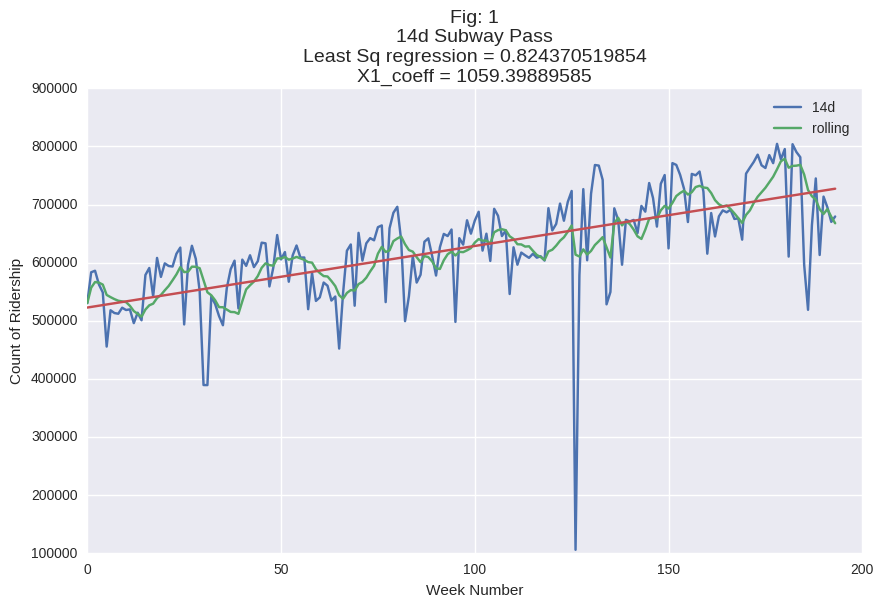

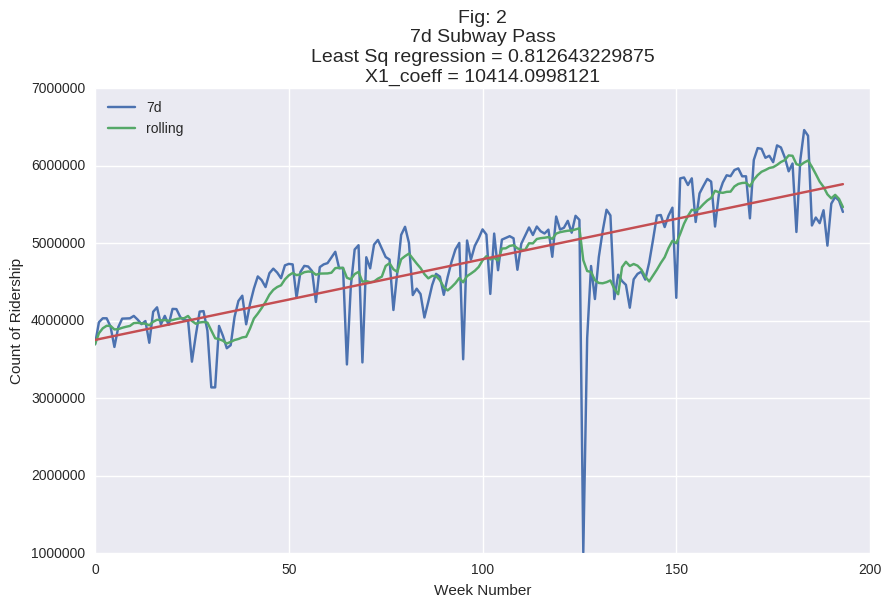

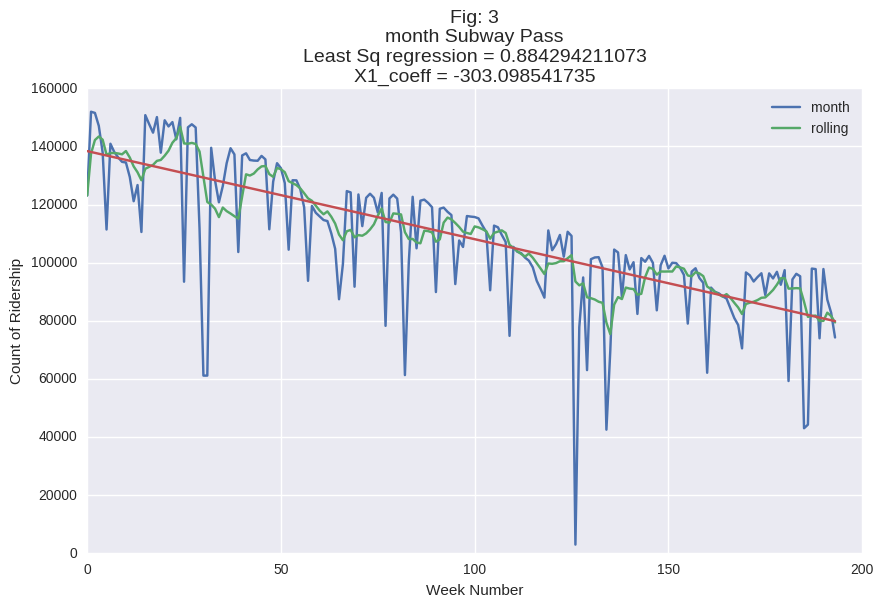

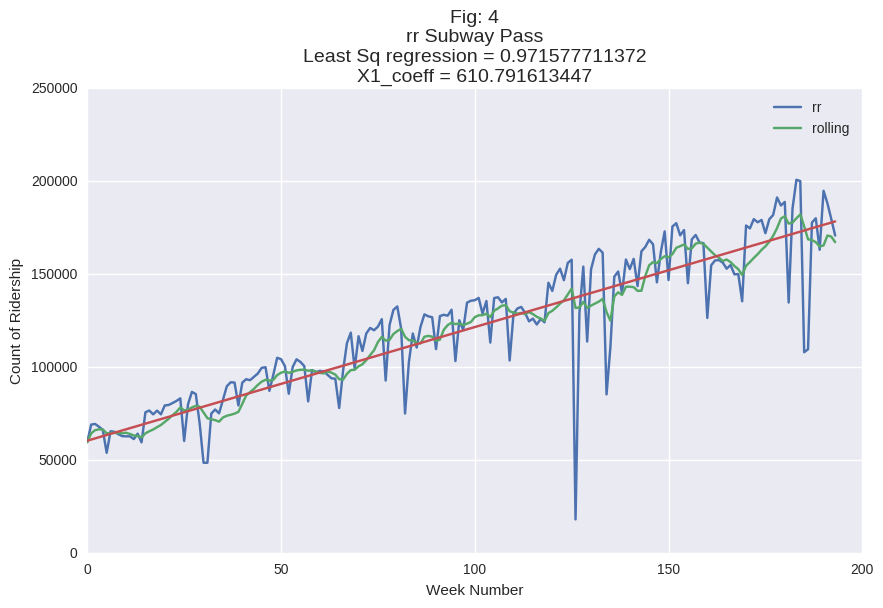

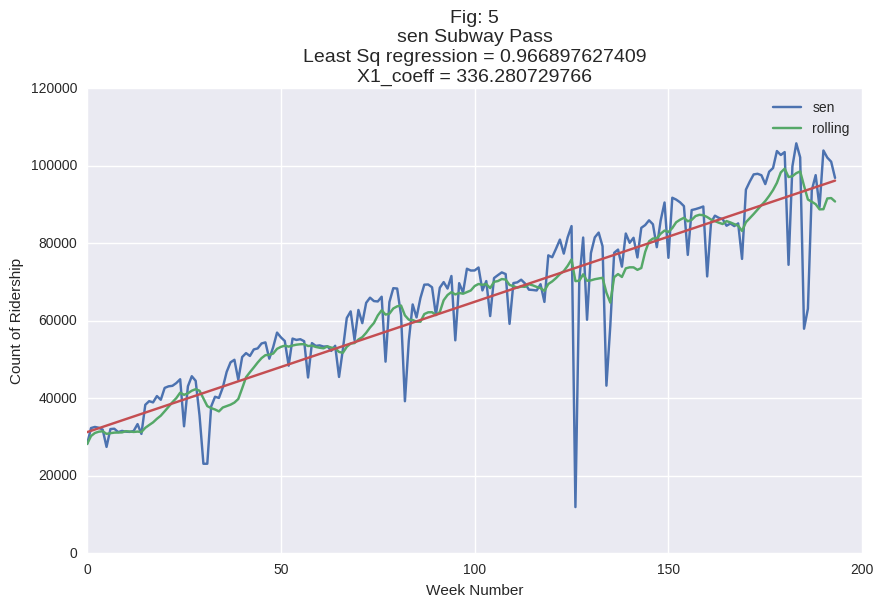

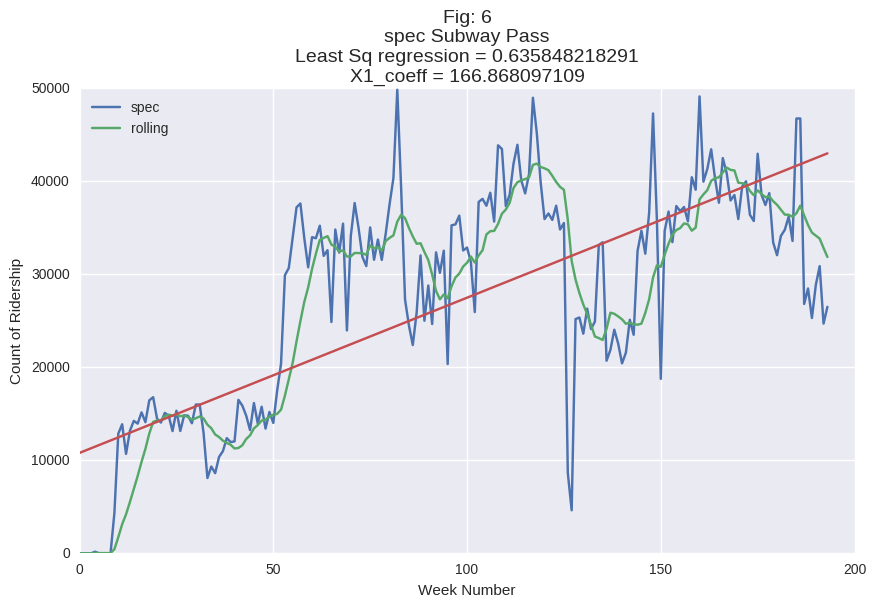

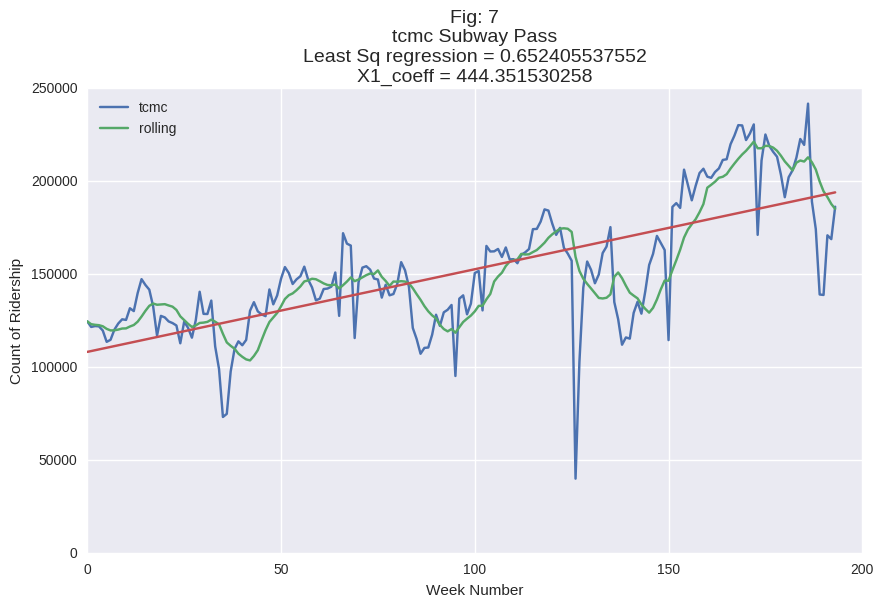

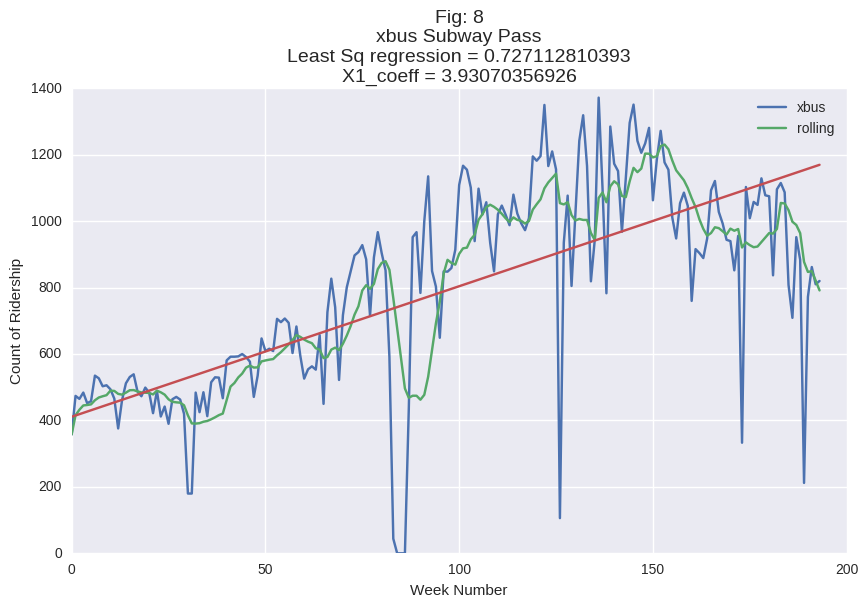

In [97]:
x = [i for i in range(0,194)]
k=1
for i in range(0, 20):
    df2 = pd.DataFrame(df1.iloc[:,i])
    df2['rolling'] = df1.iloc[:,i].rolling(window=10, min_periods=1).mean()
    model = sm.OLS(df2['rolling'], sm.add_constant(x)).fit()
    if model.rsquared > .6:
        pl.figure(figsize=(10,6))
        pl.ylabel('Count of Ridership')
        pl.xlabel('Week Number')
        pl.title(str('Fig: ' + str(k) + '\n' + df1.columns[i]) + ' Subway Pass\n' + 'Least Sq regression = ' + str(model.rsquared) + '\nX1_coeff = ' + str((model.params)[1]), fontsize=14)
        pl.plot(x, df1.iloc[:,i])
        pl.plot(x, df2['rolling'])
        pl.plot(x, model.predict(sm.add_constant(x)))
        pl.legend(loc='best')
        k+=1

## Caption for Figures 1 - 8:

The plots above display both increasing and decreasing trends in subway ridership for the selected subway card types between May 2010 and February 2014. The blue line plots ridership for each subway card; the green lines indicates the rolling mean of 10 stations, and the red line plots a least squares regression of the rolling mean. 
After comparing the ratio of both the first and last 10 weeks, it is only possible to identify the rate of change over time. However, it is not possible to perceive a clear trend in subway ridership. Following **Kristi Korsberg’s** instructions I reduce the data as shown below:


•	I selected only stations that had an average change in ridership greater than 1.05 or less than 0.95


•	In addition to that, and I order to use only relevant information, I include only stations whose least square      regression values were greater than 0.6.


After analyzing the reduced data, I realized that the only card type whose ridership presented a decreasing trend was the unlimited monthly pass. 


### Task 3: Identify the 4 stations (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks), (Can you figure out what the periodic peak in rides is due to?)

In [95]:
#Form this point and on I received substantial guidence by kristi Krosberg. 
i = 0
annuals = []
for i in range(0,600):
    elem = np.abs(np.fft.rfft(mta_all[i]))[4]
    annuals.append(elem)
    i+=1

In [96]:
station_key = [i for i in range(0,601)]

In [98]:
sorted_annual = sorted(annuals, key=float)   

In [99]:
print(sorted_annual[596:])

[2402218.5809588572, 2931895.8769513383, 2950388.929214194, 2980160.6355953491]


In [104]:
week_stations = dict(zip(station_key, annuals))
#print(week_stations)

After identifying the annual frequncy (happening 4 times throughtout the dataset) we could see top four stations:

-327: 2402218.5809588572

-150: 2931895.8769513383

-194: 2950388.929214194

-0: 2980160.6355953491

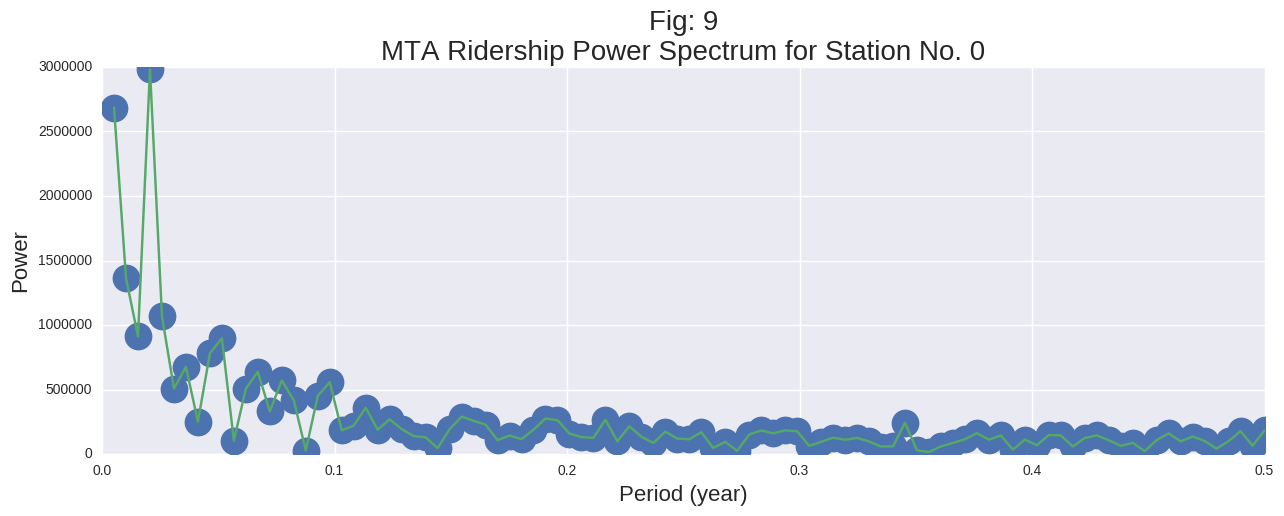

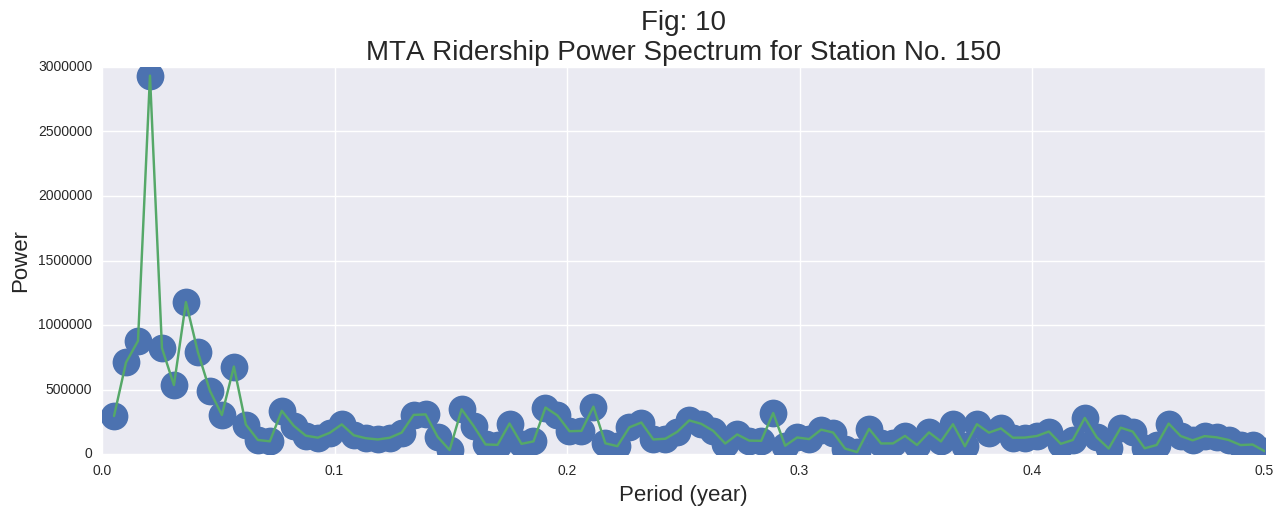

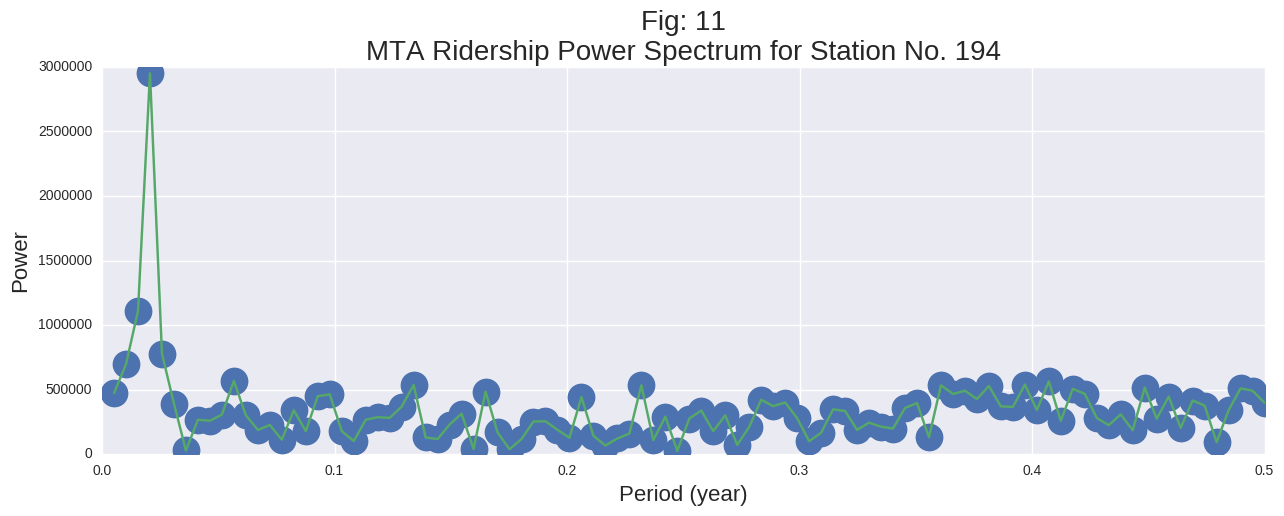

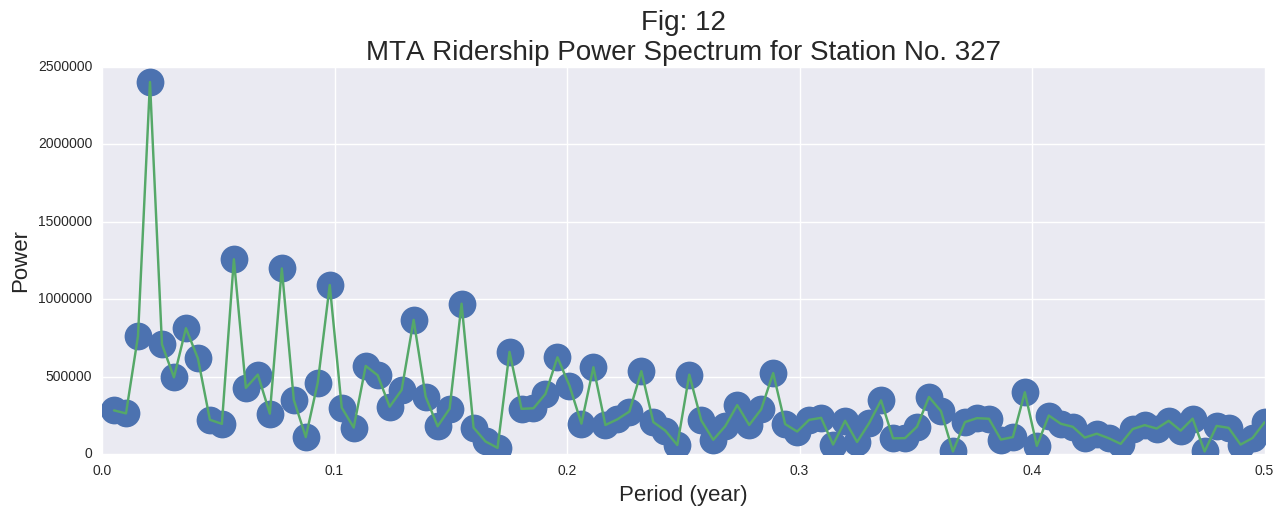

In [105]:
#Plotting the stations with highest frequency. 
N = 194
stations = [0, 150, 194, 327]
k = 9
for elem in stations:
    f = np.abs(np.fft.rfft(mta_allsum[elem]))
    fig=pl.figure(figsize=(15,5))
    ax=fig.add_subplot(111)
    ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), 'o', ms=20)
    ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')
    pl.xlabel('Period (year)', fontsize=16)
    pl.ylabel('Power', fontsize=16)
    pl.title('Fig: ' + str(k) + '\n' + 'MTA Ridership Power Spectrum for Station No. ' + str(elem), fontsize=20)
    k+=1

### Caption for Figures 9 - 12

The plots above display the information of the stations with the highest power score of ridership per year (0, 150, 194 and 237)
